In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 999)

In [2]:
df = pd.read_csv('cfr-cyber-data.csv')

In [3]:
df.head(3)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Indictment of officials from the Mabna Institute,3/28/18,NaN,The U.S. Department of Justice indicted nine o...,Criminal charges https://www.justice.gov/opa...,"United States, United Nations, UNICEF, Austral...",Iran (Islamic Republic of),Espionage,"Government, Civil society, Private sector",https://www.justice.gov/opa/pr/nine-iranians-c...,https://home.treasury.gov/news/press-releases/...,NaN
1,Rancor,6/26/18,Believed to use similar tools as DragonOK,This threat actor uses spear-phishing techniqu...,NaN,"Singapore, Cambodia",China,Espionage,"Government, Civil society",https://researchcenter.paloaltonetworks.com/20...,https://www.securityweek.com/rancor-cyber-espi...,NaN
2,Targeting of Yahya Assiri,8/1/18,NaN,"A threat actor targeted Yahya Assiri, a critic...",NaN,Yahya Assiri,Saudi Arabia,Espionage,Civil society,https://www.amnesty.org/en/latest/research/201...,NaN,NaN


In [4]:
# converting the entire Date column to datetime format
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%y', errors='ignore')
df.Date.dtype

dtype('<M8[ns]')

In [5]:
# creating a new column 'year'
df['year'] = df.Date.dt.to_period('Y')
# note: while creating new columns, always use df['column_name'] instead of df.column_name

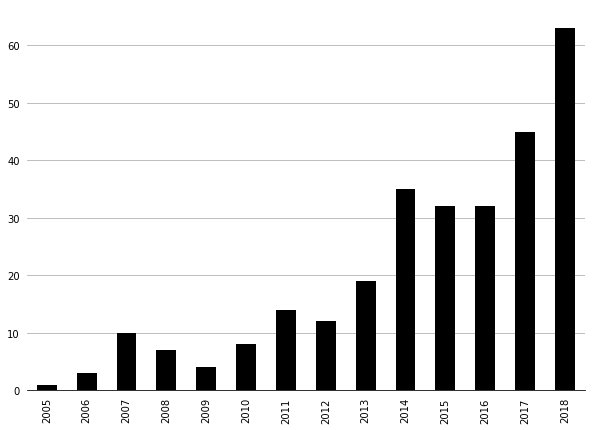

In [19]:
ax = df['year'].value_counts().sort_index().plot(x='year', kind='bar', color='black', figsize=(10,7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False, bottom=False)

ax.grid(True, axis='y')
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype':42,
    'ps.fonttype':42
})

ax.get_figure().savefig('./html_project/style/images/chart-1/chart-1.pdf')
# do this instead of plt.savefig() to make sure WYSIWYG


In [7]:
# getting all records where the US is listed as a victim
df1 = df[df['Victims'].str.contains('United States')==True]

In [8]:
df1.head(3)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,year
0,Indictment of officials from the Mabna Institute,2018-03-28,NaN,The U.S. Department of Justice indicted nine o...,Criminal charges https://www.justice.gov/opa...,"United States, United Nations, UNICEF, Austral...",Iran (Islamic Republic of),Espionage,"Government, Civil society, Private sector",https://www.justice.gov/opa/pr/nine-iranians-c...,https://home.treasury.gov/news/press-releases/...,NaN,2018
5,Targeting of organizations associated with tra...,2018-08-16,NaN,A threat actor is targeting multiple organizat...,NaN,"United States, Kenya, Mongolia, Brazil",China,Espionage,"Government, Private sector",https://www.recordedfuture.com/chinese-cyberes...,NaN,NaN,2018
7,Operation Parliament,2018-04-12,NaN,This threat actor uses spear-phishing techniqu...,NaN,"Palestine, Egypt, Jordan, United Arab Emirates...",NaN,Espionage,"Government, Civil society",https://securelist.com/operation-parliament-wh...,NaN,NaN,2018


In [9]:
df2 = df1[df1['Sponsor'].notnull() & df1['Affiliations'].notnull()]

In [10]:
df2.Sponsor.value_counts()

China                                      22
Russian Federation                         12
Iran (Islamic Republic of)                  6
Korea (Democratic People's Republic of)     3
Vietnam                                     1
France                                      1
Spain                                       1
Israel, United States                       1
United States, Israel                       1
Name: Sponsor, dtype: int64

In [11]:
df2 = df2.drop(['Sources_1', 'Sources_2', 'Sources_3'], axis=1)
df2.head()

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,year
8,Operation GhostSecret,2018-04-24,Believed to be the work of the Lazarus Group,A threat actor targets critical infrastructure...,NaN,"United States, United Kingdom, India, Thailand...",Korea (Democratic People's Republic of),Espionage,Private sector,2018
13,Winnti Umbrella,2018-05-03,"Believed to be associated with the Axiom, APT ...",This threat actor targets software companies a...,NaN,"United States, United Kingdom, Japan, South Ko...",China,Espionage,Private sector,2018
22,Targeting of U.S. energy and other critical in...,2018-03-15,Believed to be linked to the Crouching Yeti th...,A threat actor that the U.S. government believ...,Sanctions https://home.treasury.gov/news/pre...,United States,Russian Federation,Espionage,"Private sector, Government",2018
30,Targeting of U.S. defense contractors,2018-09-06,Believed to be the work of Lazarus Group,A threat actor targeted the networks of Lockhe...,Criminal charges https://www.justice.gov/opa...,United States,Korea (Democratic People's Republic of),Espionage,Private sector,2018
45,Targeting of the office of U.S. Senator Claire...,2018-07-26,Believed to be the work of APT 28,The office of U.S. Senator Claire McCaskill (D...,NaN,United States,Russian Federation,Espionage,Government,2018


In [12]:
df2.Date.dtype

dtype('<M8[ns]')

In [13]:
pd.to_datetime(df2.Date, format='%m/%d/%y', errors='ignore')

8     2018-04-24
13    2018-05-03
22    2018-03-15
30    2018-09-06
45    2018-07-26
48    2018-08-24
57    2018-04-16
67    2017-04-04
71    2017-07-05
79    2017-09-20
83    2017-11-14
88    2017-10-16
95    2017-08-30
109   2016-01-05
113   2016-10-18
115   2016-06-26
116   2016-02-01
140   2015-05-31
144   2015-06-23
145   2015-08-05
148   2015-05-14
150   2015-04-12
170   2015-04-15
172   2014-09-24
173   2014-10-28
176   2014-09-02
179   2014-07-31
181   2014-09-10
182   2014-08-07
187   2014-02-10
189   2014-03-21
191   2014-05-12
198   2014-12-02
208   2013-02-01
213   2013-09-25
214   2013-01-01
215   2013-01-14
217   2013-02-19
224   2013-06-04
225   2013-09-04
233   2012-08-09
235   2012-09-14
236   2012-04-16
241   2011-10-31
251   2011-08-03
258   2010-07-22
269   2008-11-28
286          NaT
Name: Date, dtype: datetime64[ns]

In [14]:
df2

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,year
8,Operation GhostSecret,2018-04-24,Believed to be the work of the Lazarus Group,A threat actor targets critical infrastructure...,NaN,"United States, United Kingdom, India, Thailand...",Korea (Democratic People's Republic of),Espionage,Private sector,2018
13,Winnti Umbrella,2018-05-03,"Believed to be associated with the Axiom, APT ...",This threat actor targets software companies a...,NaN,"United States, United Kingdom, Japan, South Ko...",China,Espionage,Private sector,2018
22,Targeting of U.S. energy and other critical in...,2018-03-15,Believed to be linked to the Crouching Yeti th...,A threat actor that the U.S. government believ...,Sanctions https://home.treasury.gov/news/pre...,United States,Russian Federation,Espionage,"Private sector, Government",2018
30,Targeting of U.S. defense contractors,2018-09-06,Believed to be the work of Lazarus Group,A threat actor targeted the networks of Lockhe...,Criminal charges https://www.justice.gov/opa...,United States,Korea (Democratic People's Republic of),Espionage,Private sector,2018
45,Targeting of the office of U.S. Senator Claire...,2018-07-26,Believed to be the work of APT 28,The office of U.S. Senator Claire McCaskill (D...,NaN,United States,Russian Federation,Espionage,Government,2018
48,Cobalt Dickens,2018-08-24,Believed to be associated with the Mabna Insti...,This threat actor targets universities around ...,NaN,"Australia, Canada, China, Israel, Japan, Switz...",Iran (Islamic Republic of),Espionage,Civil society,2018
57,Alleged Russian compromise of networking equip...,2018-04-16,Believed to be associated with the Black Energ...,The U.S. Department of Homeland Security and t...,Sanctions https://home.treasury.gov/news/pre...,"Worldwide, United States, United Kingdom, Ukraine",Russian Federation,Sabotage,Private sector,2018
67,APT 10,2017-04-04,"Also known as Cloud Hopper, Red Apollo, CNVX, ...",This threat actor targets managed information ...,NaN,"Japan, United States, United Kingdom, India, C...",China,Espionage,"Private sector, Government",2017
71,Targeting of Chinese-language news websites,2017-07-05,Believed to be the work of Winnti Umbrella,A threat actor targeted the China Digital Time...,NaN,United States,China,Espionage,Civil society,2017
79,APT 33,2017-09-20,Also known as Magnallium,This threat actor targets private-sector entit...,NaN,"United States, Saudi Arabia, South Korea",Iran (Islamic Republic of),Espionage,Private sector,2017
